<h1>Classification with Decision Trees: Rocks vs. Mines</h1>

<li>Classification trees are used when dealing with categorical dependent variables
<li>Pick a variable and a split point so that the misclassification cost is the lowest.

<h3>Reminder about Classifiers vs Regressors:</h3>
<li>Decision tree regressors are used when the target variable is continuous and ordered (wine quality from 0 to 10)
<li>Classifiers are used when the target variable is a set of unordered categories (birds or fish)


<h3>Stopping and Pruning Rules</h3>
<li>A minimum count of observations in each leaf node
<li>A maximum tree <b>depth</b>
<li>A maximum <b>complexity</b> (the number of splits)
<li>Using all three, you won't necessarily have a balanced tree

### In this exercise, I use the popular SONAR data set to classify rocks vs. mines

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

<h3>Download and install <a href="http://www.graphviz.org/Download.php">graphviz</a></h3>
If you are having issues using Graphviz in Windows, then try the following steps:
<ol>
<li>Install Graphviz using Homebrew
<li> Install Pydotplus. Note that you will always have to install pydot after graphviz as Pydot is Graphviz's dot language and needs Graphviz for reference. 
</ol>
<h3>Install pydotplus (using pip): Install graphviz before you install pydotplus!</h3> 

In [2]:
!pip3 install pydotplus

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df[60]=np.where(df[60]=='R',0,1)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
x_train = train.iloc[0:,0:60]
y_train = train[[60]]
x_test = test.iloc[0:,0:60]
y_test = test[[60]]
y_train

,60
130,1
79,0
18,0
88,0
185,1
...,...
116,1
150,1
91,0
164,1


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import pydotplus 

In [14]:
model = DecisionTreeClassifier(max_depth = 3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [23]:
feature_names = [key for key in df]
feature_names.pop() # removing outcome variable 
dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 

graph.write_pdf("mines.pdf") 
#The tree will be saved to mines.pdf in current directory

True

#### A screenshot of the tree is displayed below:

![](mines_tree.png)

### Next, I examine our Confusion Matrix, Precision-Recall and Accuracy scores

In [7]:
def confusion_matrix(predicted, actual, threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > 0.5: #labels that are 1.0  (positive examples)
            if predicted[i] > threshold:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:              #labels that are 0.0 (negative examples)
            if predicted[i] < threshold:
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
    rtn = [tp, fn, fp, tn]

    return rtn


In [8]:
p_train=model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train),.5))
print(confusion_matrix(p_test,np.array(y_test),.5))

[76.0, 1.0, 14.0, 54.0]
[32.0, 2.0, 9.0, 20.0]


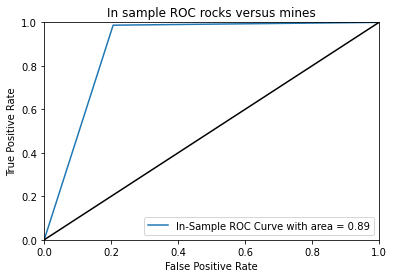

In [9]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_train,p_train)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()


In [10]:
fpr,tpr,thresholds

(array([0.        , 0.20588235, 1.        ]),
 array([0.        , 0.98701299, 1.        ]),
 array([2, 1, 0]))

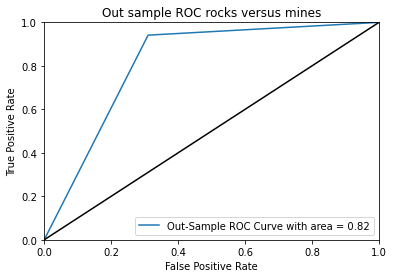

In [11]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()
